# Numerical ramp for smooth acceleration

Uses a sinusoidal profile to achieve smooth velocity transient

We are using `simpy` for symbolic mathematics, `numpy` for mathematics and `matplotlib.pyplot` for graphics

In [99]:
import numpy as np
import matplotlib.pyplot as pyplot
import sympy
from IPython.display import display

sympy.init_printing()
# sympy.init_printing(use_latex='mathjax')

print(pyplot.style.available)
pyplot.style.use('seaborn-v0_8-colorblind')


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


We are defining a sinusoidal translation with frequency $\omega$

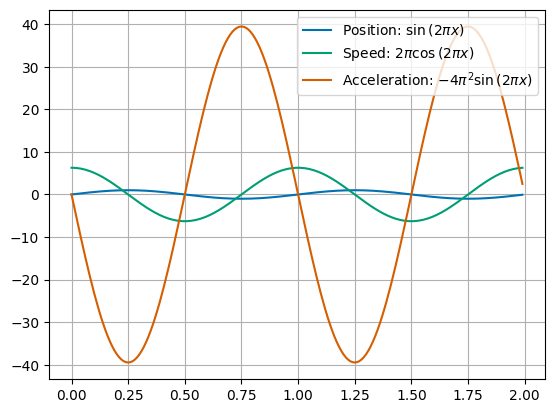

In [100]:
freq = 1.00 # Hertz
ω, x = sympy.symbols('\omega, x')
ω = 2*sympy.pi*freq

f1 = sympy.sin(ω*x)
df1 = f1.diff(x)
ddf1 = f1.diff(x,2)
display(f1, df1, ddf1)
# sympy.plot(f1, f1.diff(x), f1.diff(x,2), (x, 0, 2))

f = sympy.Lambda(x, f1)
df = sympy.Lambda(x, df1)
ddf = sympy.Lambda(x, ddf1)
# def f(x): return np.sin(float(ω)*x)
# def df(x): return np.cos(float(ω)*x)*float(ω)
# def ddf(x): return -np.sin(float(ω)*x)*np.power(float(ω),2)

range = sympy.Array(np.arange(0, 2, 0.01))

pyplot.plot(range, range.applyfunc(f), label='Position: $' + sympy.latex(f1) + '$' )
pyplot.plot( range, range.applyfunc(df), label="Speed: $" + sympy.latex(df1) + '$' )
pyplot.plot(range, range.applyfunc(ddf), label ="Acceleration: $" + sympy.latex(ddf1) + '$' )
pyplot.legend()
pyplot.grid()

Here we define the transition ramp

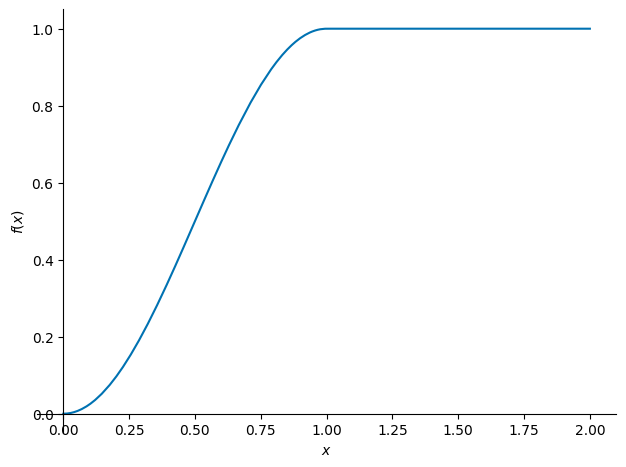

In [101]:
cut = 1/freq

sl = (1-sympy.cos(ω/2*x)) / 2
sympy.plot(sympy.Piecewise((sl, sympy.LessThan(x, cut)), (1, True)), (x, 0, 2))

⎧⎛1   cos(π⋅x)⎞                        
⎪⎜─ - ────────⎟⋅sin(2⋅π⋅x)  for x ≤ 1.0
⎨⎝2      2    ⎠                        
⎪                                      
⎩       sin(2⋅π⋅x)           otherwise 

⎧    ⎛1   cos(π⋅x)⎞              π⋅sin(π⋅x)⋅sin(2⋅π⋅x)             
⎪2⋅π⋅⎜─ - ────────⎟⋅cos(2⋅π⋅x) + ─────────────────────  for x ≤ 1.0
⎨    ⎝2      2    ⎠                        2                       
⎪                                                                  
⎩                   2⋅π⋅cos(2⋅π⋅x)                       otherwise 

⎧ 2 ⎛                                                      sin(2⋅π⋅x)⋅cos(π⋅x)
⎪π ⋅⎜2⋅(cos(π⋅x) - 1)⋅sin(2⋅π⋅x) + 2⋅sin(π⋅x)⋅cos(2⋅π⋅x) + ───────────────────
⎪   ⎝                                                               2         
⎨                                                                             
⎪                                   2                                         
⎪                               -4⋅π ⋅sin(2⋅π⋅x)                              
⎩                                                                             

⎞             
⎟  for x ≤ 1.0
⎠             
              
              
    otherwise 
              

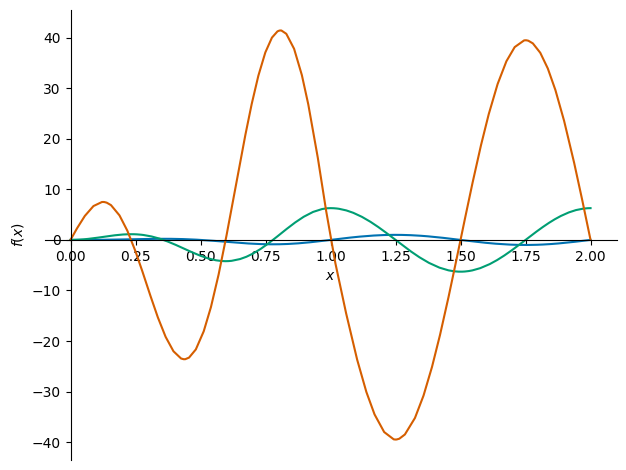

In [102]:
# def slope(x, cut):
#     slope = np.ones(len(x))
#     slope[x < (cut)] = (1-np.cos(float(ω)/2*x[x < (cut)])) / 2
#     return slope

# def dslope(x, cut):
#     dslope = np.zeros(len(x))
#     dslope[x < (cut)] = (np.sin(float(ω)/2*x[x < (cut)])) * float(ω) / 4
#     return dslope


# def ddslope(x, cut):
#     ddslope = np.zeros(len(x))
#     ddslope[x < (cut)] = (np.cos(float(ω)/2*x[x < (cut)])) * pow(float(ω),2) / 8
#     return ddslope

eq = sl*f1
sl1 = sympy.Piecewise((eq , sympy.LessThan(x, cut)), (f1, True)) 
dsl1 = sympy.Piecewise((eq.diff(x), sympy.LessThan(x, cut)), (df1, True)) 
ddsl1 = sympy.Piecewise((eq.diff(x,2), sympy.LessThan(x, cut)), (ddf1, True)) 

display(sl1, dsl1, ddsl1)
sympy.plot(sl1, dsl1, ddsl1, (x, 0, 2))


In [103]:
lambda1 = sympy.Lambda(x, sl1)
dlambda1 = sympy.Lambda(x, dsl1)
ddlambda1 = sympy.Lambda(x, ddsl1)


Here is the plotted result of such approach for position, velocity and acceleration

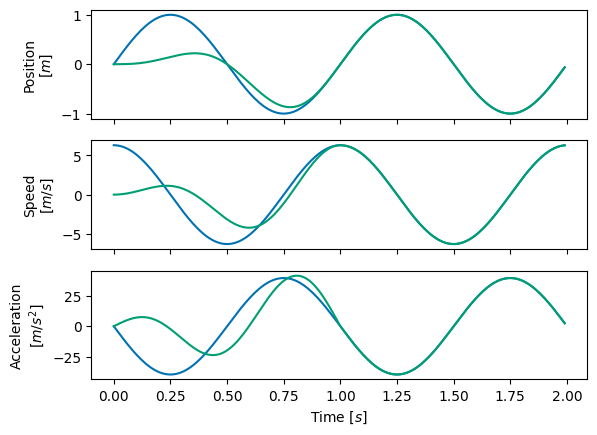

In [111]:
fig, axs = pyplot.subplots(3, sharex=True)

axs[0].set_ylabel("Position\n[$m$]")
axs[0].plot(range, range.applyfunc(f), label='Sem rampa')
axs[0].plot(range, range.applyfunc(lambda1), label='Com rampa')

axs[1].set_ylabel("Speed\n[$m/s$]")
axs[1].plot(range, range.applyfunc(df), label='Sem rampa')
axs[1].plot(range, range.applyfunc(dlambda1), label='Com rampa')


axs[2].set_ylabel('Acceleration\n[$m/s^2$]')
axs[2].set_xlabel("Time [$s$]")
axs[2].plot(range, range.applyfunc(ddf), label='Sem rampa')
axs[2].plot(range, range.applyfunc(ddlambda1), label='Com rampa')

